In [46]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

x_val = train_images[:20000]
partial_x_train = train_images[20000:]

y_val = train_labels[:20000]
partial_y_train = train_labels[20000:]


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = network.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))
test_loss, test_acc = network.evaluate(test_images, test_labels)

Train on 40000 samples, validate on 20000 samples
Epoch 1/20
40000/40000 [==============================] - 3s 64us/step - loss: 0.3086 - acc: 0.9104 - val_loss: 0.1702 - val_acc: 0.9502
Epoch 2/20
40000/40000 [==============================] - 2s 61us/step - loss: 0.1317 - acc: 0.9611 - val_loss: 0.1130 - val_acc: 0.9678
Epoch 3/20
40000/40000 [==============================] - 2s 60us/step - loss: 0.0857 - acc: 0.9744 - val_loss: 0.1097 - val_acc: 0.9668
Epoch 4/20
40000/40000 [==============================] - 2s 55us/step - loss: 0.0617 - acc: 0.9813 - val_loss: 0.0943 - val_acc: 0.9711
Epoch 5/20
40000/40000 [==============================] - 2s 50us/step - loss: 0.0452 - acc: 0.9866 - val_loss: 0.0840 - val_acc: 0.9746
Epoch 6/20
40000/40000 [==============================] - 2s 52us/step - loss: 0.0336 - acc: 0.9904 - val_loss: 0.0811 - val_acc: 0.9768
Epoch 7/20
40000/40000 [==============================] - 2s 60us/step - loss: 0.0259 - acc: 0.9923 - val_loss: 0.0844 - val_acc

In [47]:
print('test_acc:', test_acc)

test_acc: 0.9809


In [48]:
history_dict = history.history

In [49]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

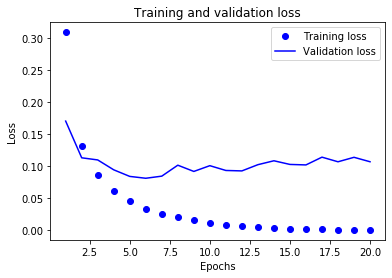

In [50]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

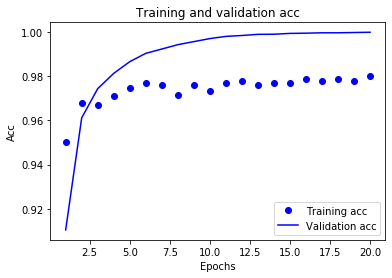

In [51]:
plt.clf()

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, val_acc, 'bo', label='Training acc')
plt.plot(epochs, acc, 'b', label='Validation acc')

plt.title('Training and validation acc')

plt.xlabel('Epochs')
plt.ylabel('Acc')

plt.legend()

plt.show()

In [52]:
predictions = network.predict(test_images)

In [53]:
print(predictions)

[[8.0789969e-15 3.0667143e-20 4.9133229e-13 ... 1.0000000e+00
  7.1623703e-16 6.8349046e-12]
 [6.9563542e-22 5.9805968e-16 1.0000000e+00 ... 0.0000000e+00
  2.3937719e-17 2.0886891e-33]
 [1.8092266e-13 9.9999917e-01 2.1047970e-09 ... 1.1447231e-07
  7.2424598e-07 5.0652759e-12]
 ...
 [1.4542224e-27 4.8825887e-20 6.9998436e-24 ... 4.1665107e-14
  2.3709947e-12 7.7242823e-11]
 [3.8461803e-22 6.4347756e-23 1.8406260e-26 ... 6.4342509e-26
  4.2752926e-11 2.6701102e-24]
 [1.3350630e-23 2.6857994e-33 6.6915423e-23 ... 9.5699816e-33
  9.6743583e-28 1.2382327e-28]]


In [54]:
predictions[0].shape

(10,)

In [55]:
np.sum(predictions)

10000.0

In [56]:
np.argmax(predictions[5])

1

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

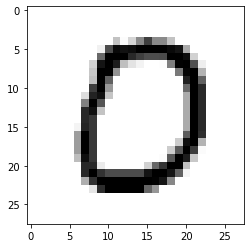

In [59]:
tes = test_images[10]

plt.imshow(tes, cmap=plt.cm.binary)
plt.show()

In [60]:
np.argmax(predictions[8])

5